## Exploracion de DataSet

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import seaborn as sns



missing_values = ["n.a.","NA","n/a", "na","none", 0] # lista con todos los posibles valores faltantes y cambiarlos todos a NaN
students_dataset = pd.read_csv('StudentsPerformance.csv', na_values = missing_values) # cambiandolos todos a NaN
students_dataset.head(10)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,NaN,72.0,72,74
1,female,group C,some college,standard,completed,69.0,90,88
2,female,group B,master's degree,standard,NaN,90.0,95,93
3,male,group A,associate's degree,free/reduced,NaN,47.0,57,44
4,male,group C,some college,standard,NaN,76.0,78,75
5,female,group B,associate's degree,standard,NaN,71.0,83,78
6,female,group B,some college,standard,completed,88.0,95,92
7,male,group B,some college,free/reduced,NaN,40.0,43,39
8,male,group D,high school,free/reduced,completed,64.0,64,67
9,female,group B,high school,free/reduced,NaN,38.0,60,50


In [107]:
#informacion general del dataset
print(students_dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      358 non-null    object 
 5   math score                   999 non-null    float64
 6   reading score                1000 non-null   int64  
 7   writing score                1000 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB
None


In [108]:
students_dataset['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [109]:
students_dataset['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [110]:
students_dataset['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

## Limpieza de los Datos


In [111]:

#rellenar con la nota promedio el unico valor faltante de 'math score' y pasar las notas a valores enteros
cl_students_dataset = students_dataset['math score'] = students_dataset['math score'].fillna(round(students_dataset['math score'].mean())).astype(int)

#ordenar de mayor a menor las columnas de notas e iliminar las columnas 'test preparation course' y 'race/ethnicity'
cl_students_dataset = students_dataset.sort_values(['math score', 'writing score', 'reading score'], ascending=True).drop(['test preparation course', 'race/ethnicity'], axis=1)

In [112]:
cl_students_dataset.head(10)
#se muestra el dataset limpio y listo para trabajar

,gender,parental level of education,lunch,math score,reading score,writing score
980,female,high school,free/reduced,8,24,23
17,female,some high school,free/reduced,18,32,28
787,female,some college,standard,19,38,32
145,female,some college,free/reduced,22,39,33
842,female,high school,free/reduced,23,44,36
338,female,some high school,free/reduced,24,38,27
466,female,associate's degree,free/reduced,26,31,38
363,female,some high school,free/reduced,27,34,32
91,male,high school,free/reduced,27,34,36
327,male,some college,free/reduced,28,23,19


In [113]:
#ver si hay duplicados que eliminar en el datase
cl_students_dataset.duplicated().any()

False

## Realizacion de los objetivos puestos para este dataset

    1. Averiguar si hay brechas de rendimiento entre generos

In [114]:
materias = ['math score', 'reading score', 'writing score']

#este for va a calcular el porcentaje de hombres y mujeres que aprobaron los distintos examenes
for i in materias:
    m_aprobadas_score = cl_students_dataset[(cl_students_dataset['gender'] == 'female') & (cl_students_dataset[i] >= 65)].shape[0]
    h_aprobados_score = cl_students_dataset[(cl_students_dataset['gender'] == 'male') & (cl_students_dataset[i] >= 65)].shape[0]
    porcent_de_m_aprobadas = (m_aprobadas_score / 1000) * 100
    porcent_de_h_aprobados = (h_aprobados_score / 1000) * 100

    porcent_de_m_aprobadas = round(porcent_de_m_aprobadas, 2)
    porcent_de_h_aprobados = round(porcent_de_h_aprobados, 2)
    print(f'__________{i}__________')
    print(f'El porcentaje de hombres aprobados en {i} es del {porcent_de_h_aprobados} %')
    print(f'El porcentaje de mujeres aprobadas en {i} es del {porcent_de_m_aprobadas} %\n')
    if porcent_de_h_aprobados > porcent_de_m_aprobadas:
        print(f'Los hombres tienen un {porcent_de_h_aprobados - porcent_de_m_aprobadas} % más de aprobados en {i} que las mujeres\n')
    else:
        print(f'Las mujeres tienen un {porcent_de_m_aprobadas - porcent_de_h_aprobados} % más de aprobados en {i} que los hombres\n')
#se muestra el porcentaje de aprobados en cada materia y se compara el porcentaje de aprobados entre hombres y mujeres

__________math score__________
El porcentaje de hombres aprobados en math score es del 29.2 %
El porcentaje de mujeres aprobadas en math score es del 26.2 %

Los hombres tienen un 3.0 % más de aprobados en math score que las mujeres

__________reading score__________
El porcentaje de hombres aprobados en reading score es del 25.7 %
El porcentaje de mujeres aprobadas en reading score es del 37.0 %

Las mujeres tienen un 11.3 % más de aprobados en reading score que los hombres

__________writing score__________
El porcentaje de hombres aprobados en writing score es del 23.5 %
El porcentaje de mujeres aprobadas en writing score es del 37.9 %

Las mujeres tienen un 14.399999999999999 % más de aprobados en writing score que los hombres



Graficos para visualizar la distribución de notas y ver las de las notas tendencias

C:\Users\Jorge Leon\AppData\Local\Temp\ipykernel_16632\2309478245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cl_students_dataset, x='gender', y=materia, palette='muted')


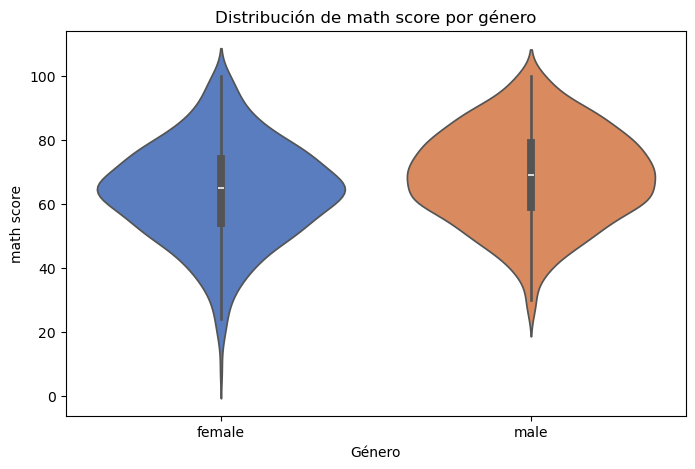

C:\Users\Jorge Leon\AppData\Local\Temp\ipykernel_16632\2309478245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cl_students_dataset, x='gender', y=materia, palette='muted')


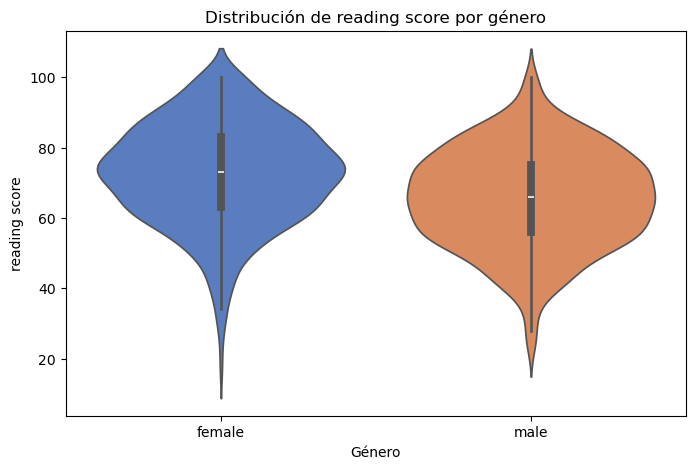

C:\Users\Jorge Leon\AppData\Local\Temp\ipykernel_16632\2309478245.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cl_students_dataset, x='gender', y=materia, palette='muted')


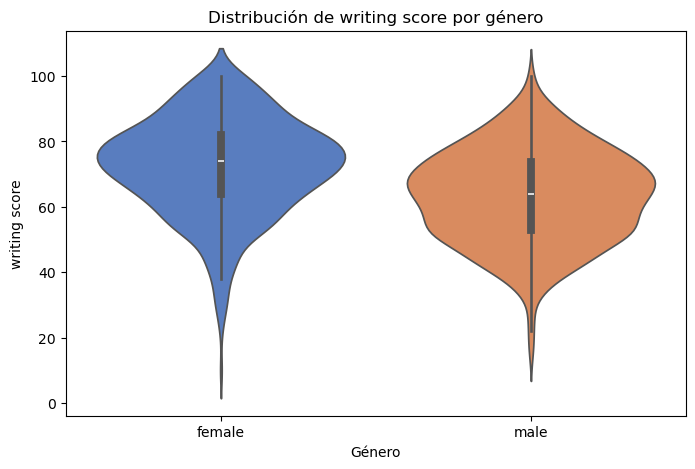

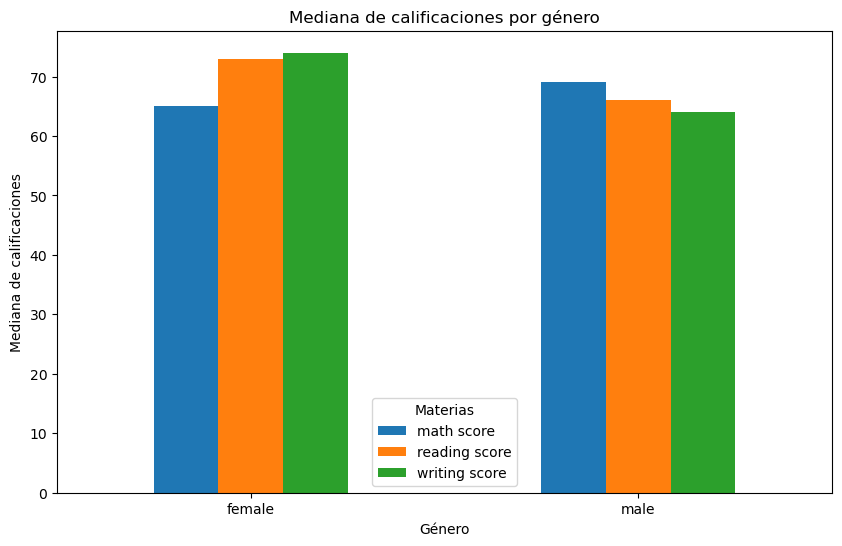

In [115]:
# Violin plot para visualizar la distribución de las calificaciones por género
for materia in materias:
    plt.figure(figsize=(8, 5))
    sns.violinplot(data=cl_students_dataset, x='gender', y=materia, palette='muted')
    plt.title(f'Distribución de {materia} por género')
    plt.xlabel('Género')
    plt.ylabel(f'{materia}')
    plt.show()

# Gráfico de barras para comparar las medianas de calificaciones por género
medianas_genero = cl_students_dataset.groupby('gender')[materias].median()

medianas_genero.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Mediana de calificaciones por género')
plt.ylabel('Mediana de calificaciones')
plt.xlabel('Género')
plt.xticks(rotation=0)
plt.legend(title='Materias')
plt.show()

Gracias a esto vemos que como tal no hay una brecha notable en el rendimiento de entre hombres y mujeres pero que las mujeres sobre salen un poco mas en los examenes de writing y reading

    2. Investigar si los estudiantes que reciben almuerzo gratuito tienen menores calificaciones en promedio.

In [116]:
df_fl = cl_students_dataset[(cl_students_dataset['lunch'] == 'free/reduced')][['lunch','math score','reading score','writing score']]

for i in materias:
    free_lunch_mean_sc = df_fl[i].mean()
    
    print(f'La calificacion promedio de los alumnos con almuerzo gratuito en {i} fue de {free_lunch_mean_sc} \n')

print("____________________________________________________________\n")

df_stl = cl_students_dataset[(cl_students_dataset['lunch'] == 'standard')][['lunch','math score','reading score','writing score']]

for i in materias:
    standar_free_lunch_mean_sc = df_stl[i].mean()
    
    print(f'La calificacion promedio de los alumnos con almuerzo no gratuito en {i} fue de {standar_free_lunch_mean_sc} \n')

La calificacion promedio de los alumnos con almuerzo gratuito en math score fue de 59.10704225352113 

La calificacion promedio de los alumnos con almuerzo gratuito en reading score fue de 64.65352112676057 

La calificacion promedio de los alumnos con almuerzo gratuito en writing score fue de 63.02253521126761 

____________________________________________________________

La calificacion promedio de los alumnos con almuerzo no gratuito en math score fue de 70.03410852713178 

La calificacion promedio de los alumnos con almuerzo no gratuito en reading score fue de 71.65426356589147 

La calificacion promedio de los alumnos con almuerzo no gratuito en writing score fue de 70.8232558139535 



Con esto vemos que los estudiantes que reciben almuerzo gratis tienden a tener notas menores que los que no tienen almuerzo gratis

    3. Identificar qué grupos de estudiantes pueden requerir apoyo adicional.

In [117]:
cl_students_dataset['parental level of education'].value_counts()

parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

Quiero ver si hay una relacion entre el nivel de educacion parental con las notas de los estudiantes para determinar que grupo podria necesitar apoyo adicional

In [118]:

p_level_education = ['some college', "associate's degree", 'high school', 'some high school', "bachelor's degree", "master's degree"]

# Agrupar por nivel de educación parental y calcular el promedio de las calificaciones
promedios = students_dataset.groupby('parental level of education')[['math score', 'reading score', 'writing score']].median() 
''' 
uso la media ya que por las notas hay muchos valores atipicos y 
las cantidades de estudiantes con distintos niveles de educacion 
parental son muy distintos unos de los otros
'''
# se filtran los niveles de educación parental en la lista
promedios_filtrados = promedios.loc[p_level_education]
print(promedios_filtrados)

                             math score  reading score  writing score
parental level of education                                          
some college                       67.5           70.5           70.0
associate's degree                 67.0           72.5           70.5
high school                        63.0           66.0           64.0
some high school                   65.0           67.0           66.0
bachelor's degree                  68.0           73.0           74.0
master's degree                    73.0           76.0           75.0


Viendo los resultados de la tabla, se podria decir que los grupos que podrian requerir un apoyo extra son los grupos con educacion familiar high school y some high school